# Assignment 6
### Do Question 6, and three more questions of your choice.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
plt.rcParams["figure.figsize"] = (14, 8)
random_seed = 12365478900

metabric = pd.read_csv('../data/metabric.csv')

### 6. Some Common Distributions

For the following distributions:
- Determine the support
- Compute the density from the distribution for the logistic and exponential distributions (take a derivative)
- Plot the density and distribution for a variety of parameter values
- Take a sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, plot a KDE and ECDF, visually compare with the theoretical pdf/cdf
- Find an example of this general type of PDF/CDF from the Metabric cancer data

You can use https://docs.scipy.org/doc/scipy/reference/stats.html to generate values for the pdf/cdf and generate samples of random variates.


- Logistic distribution (similar to normal): 
$$
F(x; \sigma) = \dfrac{1}{1+e^{-x/\sigma}} 
$$
with $\sigma >0$.
- Exponential distribution (similar to log-normal):
$$
F_X(x) = \begin{cases}
0, & x<0 \\
1 - e^{-\lambda x}, & x \ge 0,
\end{cases}
$$
with $\lambda > 0$.
- Negative Binomial (similar to Poisson): The probability mass function for positive integers is:
$$
f(k;r,p) = \dfrac{(k+r-1)!}{k!(r-1)!}(1-p)^k p^r, \quad \text{ for $k=0,...n$}
$$
You can interpret this as follows: Flip a coin that comes up heads with probability $p$ until you get $r$ heads, and then stop. What is the probability of stopping at each $k=0,1,2,...$?
- Categorical (similar to Bernoulli): The probability mass function over $k = 1, 2, ..., K$ categories is
$$
f(k;p_1,...,p_K) = p_1^{k=1}p_2^{k=2}...p_K^{k=K}
$$
where $0 \le p_i \le 1$ and $ \sum_{k=1}^K p_k = 1$.


---

#### Logistic distribution
The cumulative distribution function
$$
F(x; \sigma) = \dfrac{1}{1+e^{-x/\sigma}} 
$$
yields the probability density function
$$
f(x; \sigma) = \dfrac{e^{-x/\sigma}}{\sigma(1+e^{-x/\sigma})^2} 
$$
with $\sigma >0$.

The support for this distribution is $-\infty < x < \infty$

<!--
References

https://en.wikipedia.org/wiki/Logistic_distribution
https://www.acsu.buffalo.edu/~adamcunn/probability/logistic.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genlogistic.html#scipy.stats.genlogistic

-->

In [3]:
def plot_distributions(fx, Fx, distribution_name, scale_name="Scale", xmin=-20, xmax=20, xstep=0.1, scales=[0.5,1,2,5]):
    
    distribution = pd.DataFrame(columns=['x', scale_name, 'probability', 'cumulative'], dtype=np.float64)
    
    for scale in scales:
        for x in np.arange(xmin, xmax+xstep, xstep):
            probability = fx(scale, x)
            cumulative = Fx(scale, x)
            distribution.loc[len(distribution)] = [x, scale, probability, cumulative]
        
    plots = {'probability': 'Probability Density Function',
             'cumulative': 'Cumulative Distribution Function'
            }
    
    for column, title in plots.items():
        sns.lineplot(distribution, x='x', y=column, hue=scale_name, marker=None)
        plt.title(f'{title} of {distribution_name} Distribution')
        plt.xlabel('x')
        plt.ylabel('Probability')
        plt.grid(True, linestyle='--', color='gray', alpha=0.6)
        plt.show()

def plot_samples(samplefx, distribution_name, scale_name="Scale", samplecount=1000, scales=[0.5,1,2,5], xmin=-20, xmax=20):
#
# samplefx is a function that takes a numpy random number generator, scale and number of samples as arguments
# and returns a numpy array of samples
#

    rng = np.random.default_rng(random_seed)

    samples = pd.DataFrame(columns=['value', scale_name], dtype=np.float64)
    
    for scale in scales:
        for x in samplefx(rng, scale, samplecount):
            #print(f'adding sample {x} for scale {scale}')
            samples.loc[len(samples)] = [x, scale]
    
    plots = {'kde': 'KDE',
             'ecdf': 'EDF'
            }
    
    for kind, title in plots.items():
        sns.displot(samples, x='value', hue=scale_name, kind=kind)
        plt.title(f'{title} for {distribution_name} Distribution')
        plt.xlim(xmin, xmax)
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.grid(True, linestyle='--', color='gray', alpha=0.6)
        plt.show()


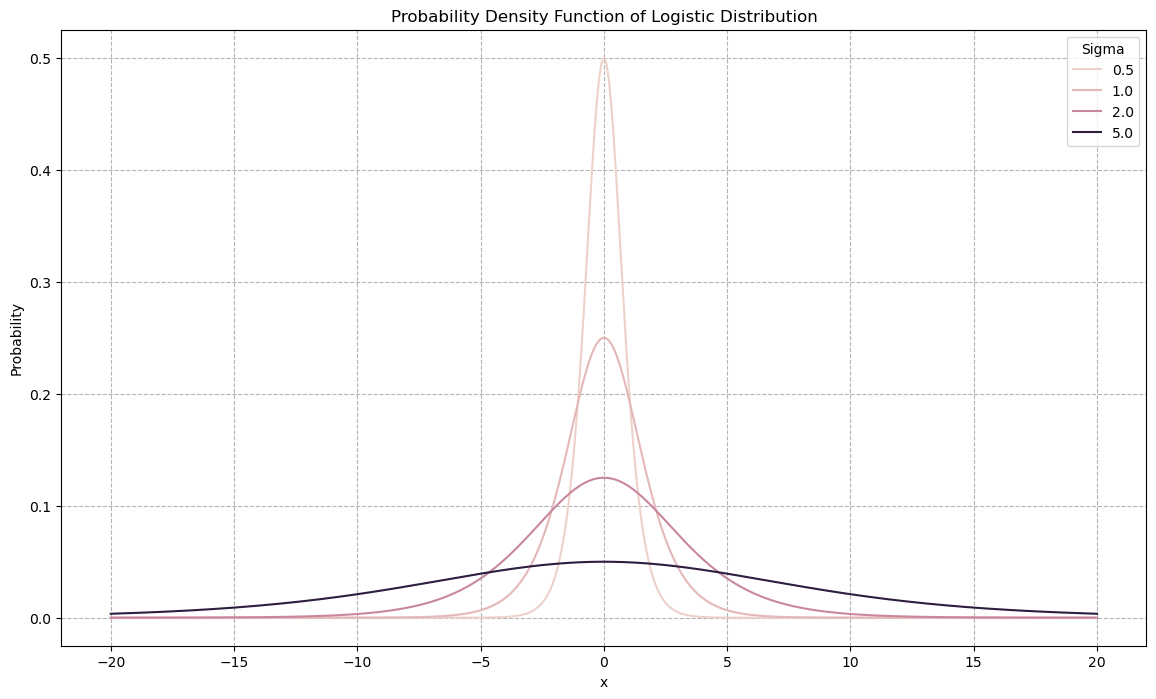

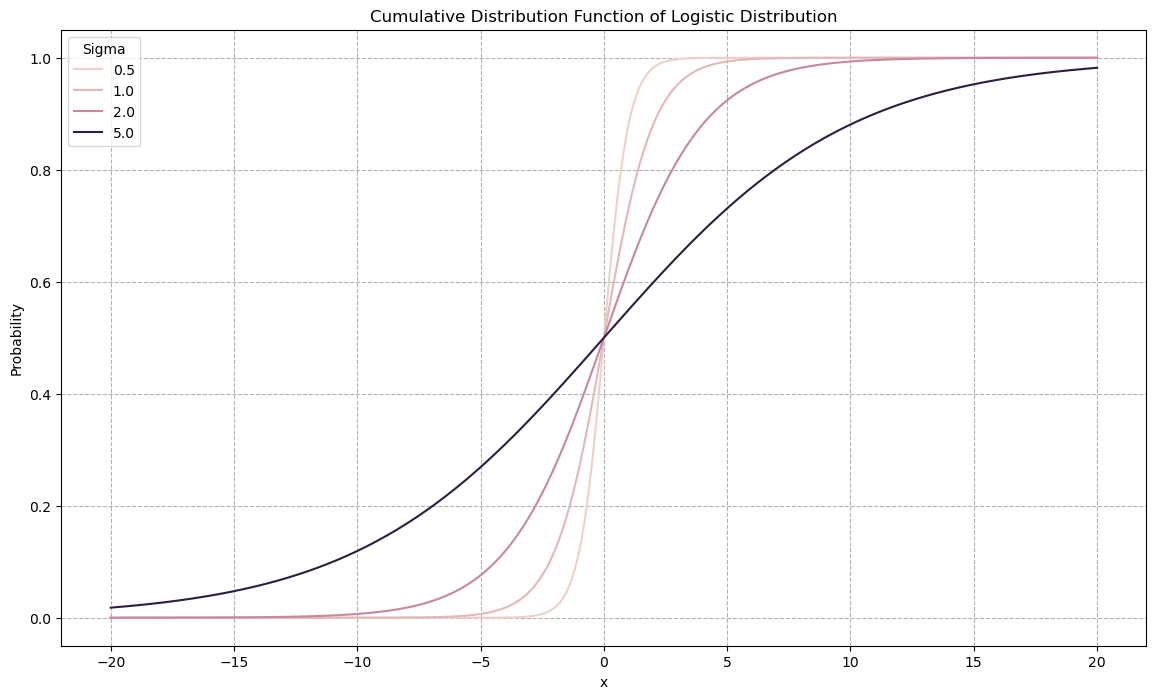

In [4]:
l_fx = lambda sigma, x: 1/sigma * (np.exp(-x/sigma) / ( (1 + np.exp(-x/sigma))**2 ))
l_Fx = lambda sigma, x: 1 / (1 + np.exp(-x/sigma))
plot_distributions(l_fx, l_Fx, 'Logistic', 'Sigma')



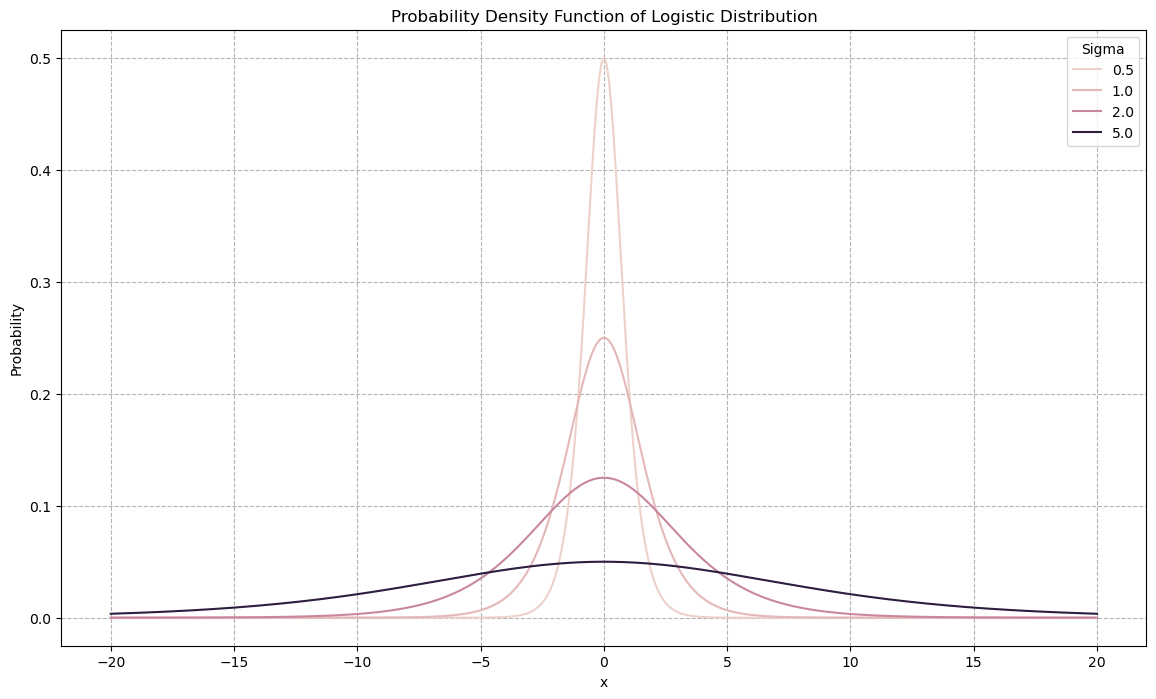

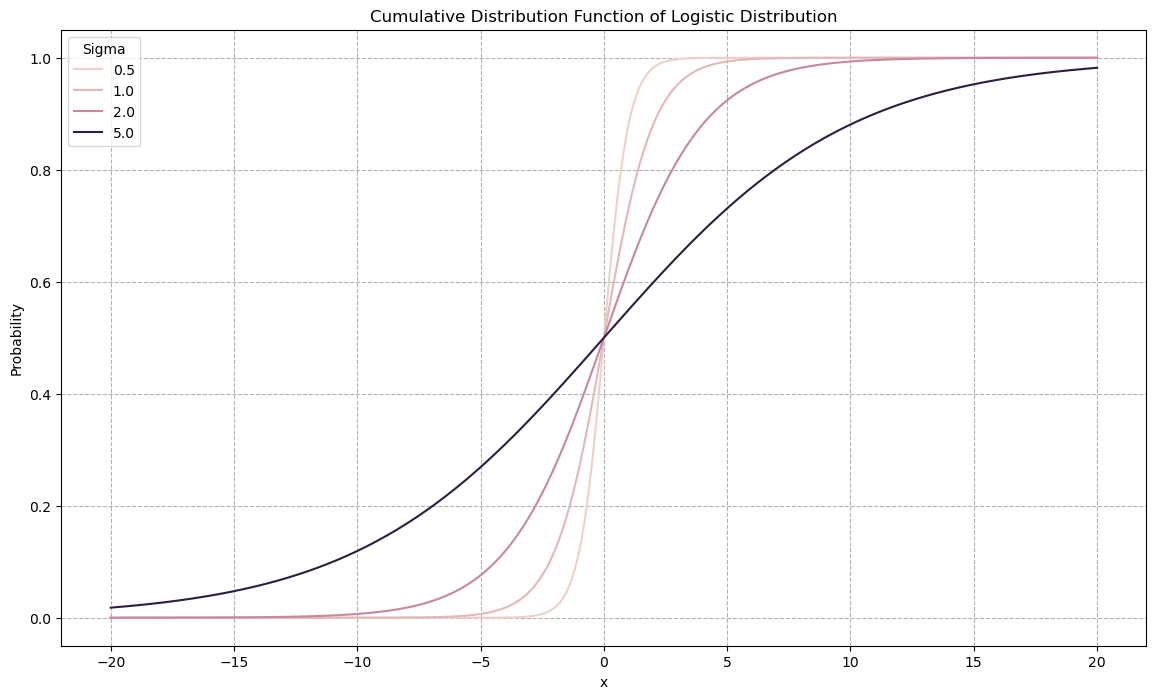

In [5]:
# Compare to scipy implementation
fx = lambda sigma, x: stats.logistic.pdf(x, scale=sigma, loc=0)
Fx = lambda sigma, x: stats.logistic.cdf(x, scale=sigma, loc=0)
# fx = lambda sigma, x: stats.genlogistic.pdf(x, c=sigma, scale=1, loc=0)
# Fx = lambda sigma, x: stats.genlogistic.cdf(x, c=sigma, scale=1, loc=0)
plot_distributions(fx, Fx, 'Logistic', 'Sigma')

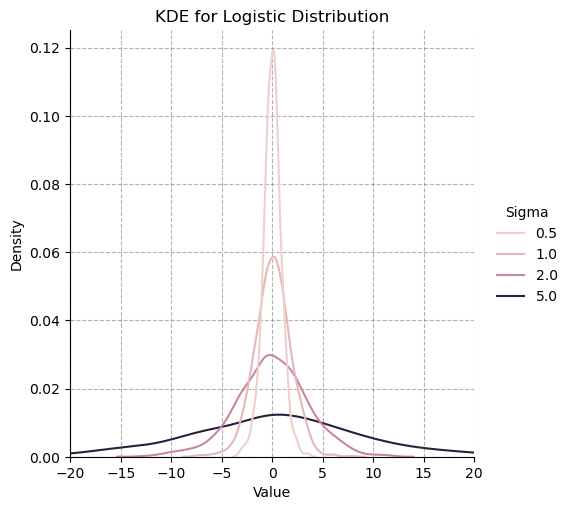

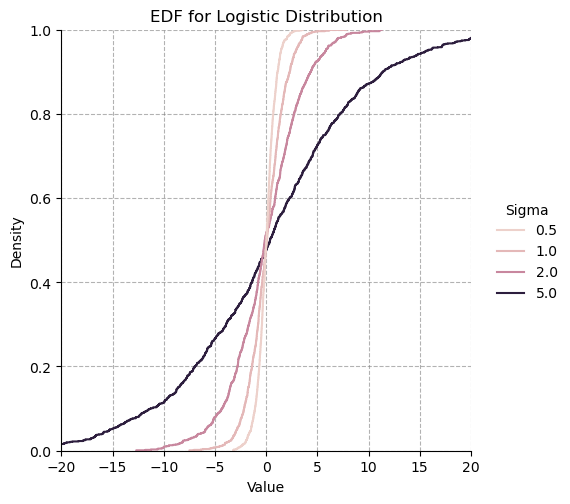

In [6]:
plot_samples(lambda rng, scale, n: rng.logistic(scale=scale, size=n), 'Logistic', 'Sigma')

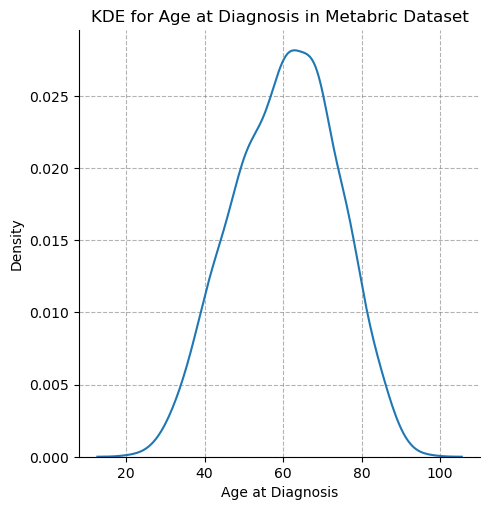

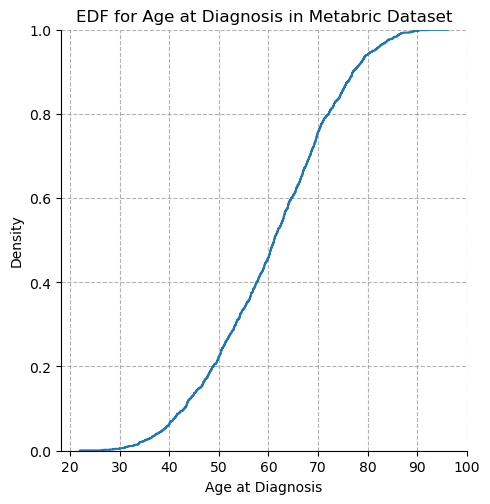

In [45]:
# Logistic Distribution in Metabric Dataset
# Age at Diagnosis has a roughly logistic distribution

plots = {'kde': 'KDE',
         'ecdf': 'EDF'
        }

for kind, title in plots.items():
    sns.displot(metabric, x='Age at Diagnosis', kind=kind)
    plt.title(f'{title} for Age at Diagnosis in Metabric Dataset')
    plt.xlabel('Age at Diagnosis')
    plt.ylabel('Density')
    plt.grid(True, linestyle='--', color='gray', alpha=0.6)
    plt.show()

#### Exponential distribution
The cumulative distribution function
$$
F_X(x) = \begin{cases}
0, & x<0 \\
1 - e^{-\lambda x}, & x \ge 0,
\end{cases}
$$

yields the probability density function
$$
F_X(x) = \begin{cases}
0, & x<0 \\
\lambda e^{-\lambda x}, & x \ge 0,
\end{cases}
$$
with $\lambda > 0$.

The support for this distribution is $0 <= x < \infty$

<!--
References

https://en.wikipedia.org/wiki/Exponential_distribution
https://www.acsu.buffalo.edu/~adamcunn/probability/exponential.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon
-->

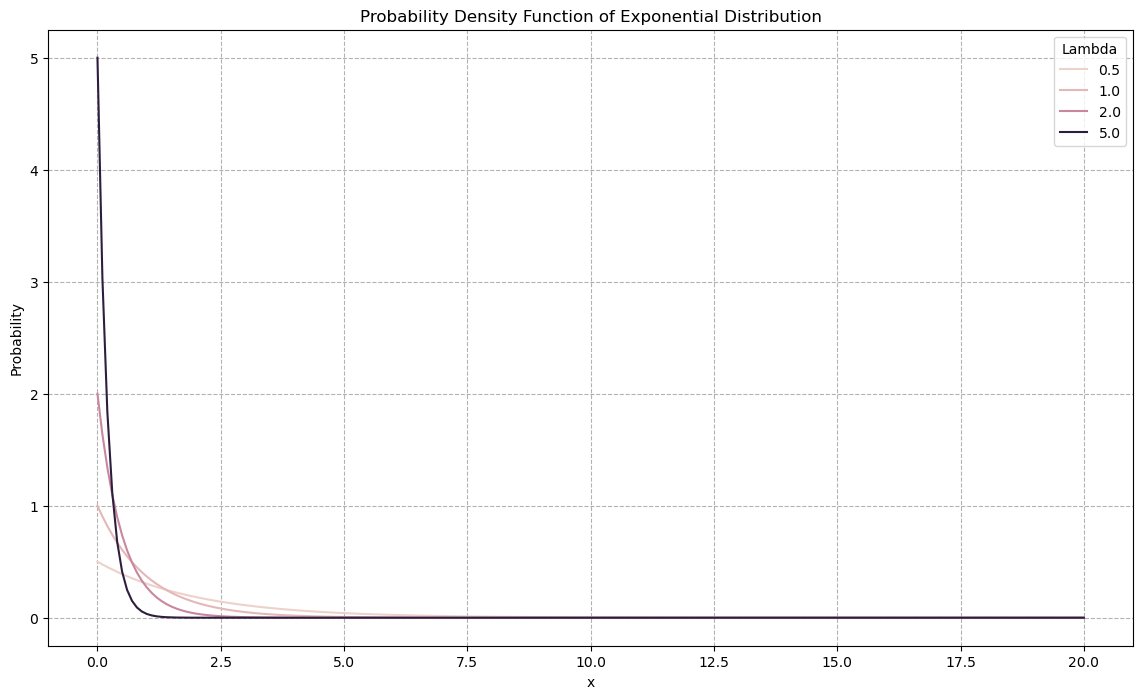

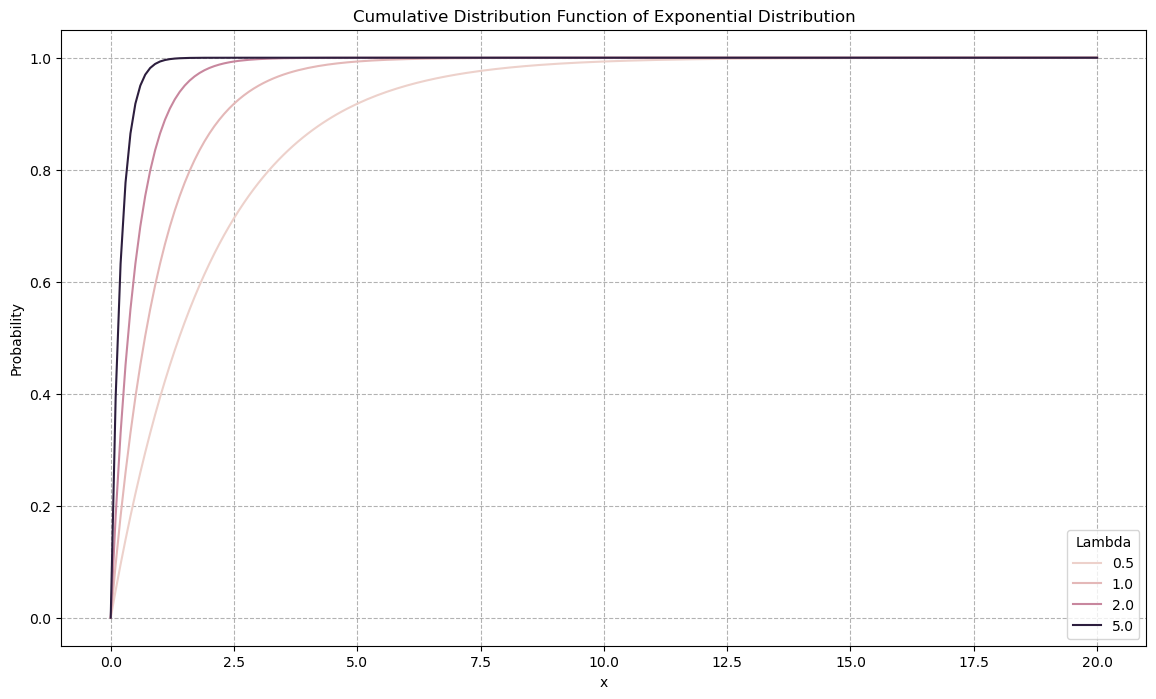

In [7]:
e_fx = lambda lam, x: lam * np.exp(-lam * x)
e_Fx = lambda lam, x: 1 - np.exp(-lam * x)
plot_distributions(e_fx, e_Fx, 'Exponential', 'Lambda', xmin=0)

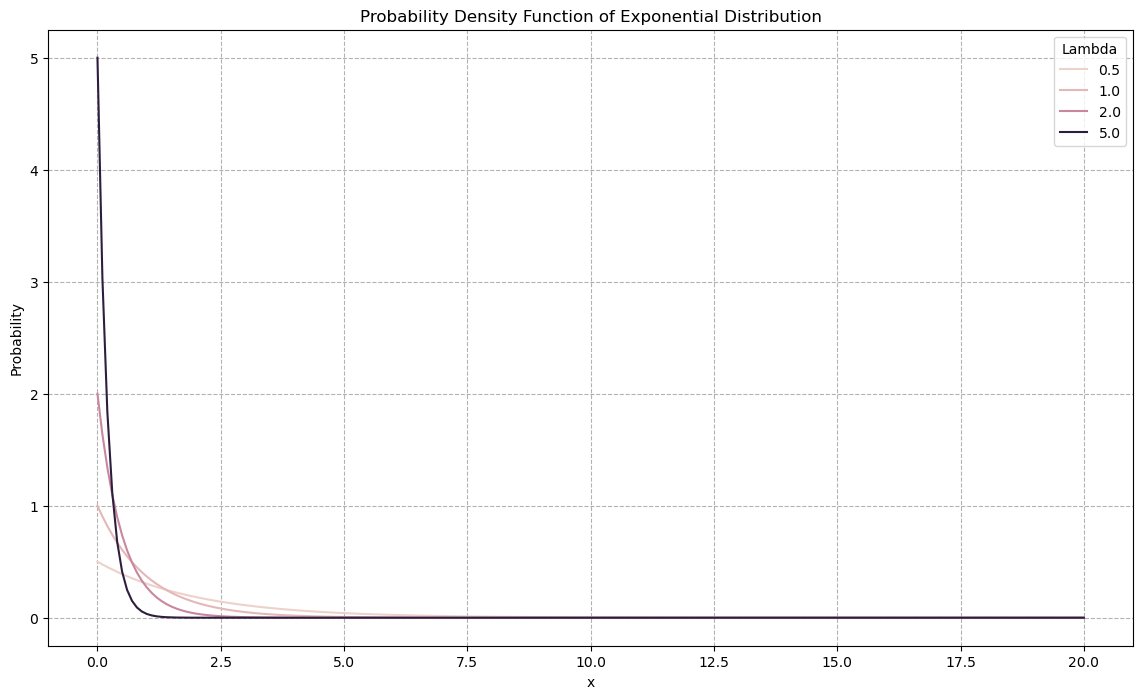

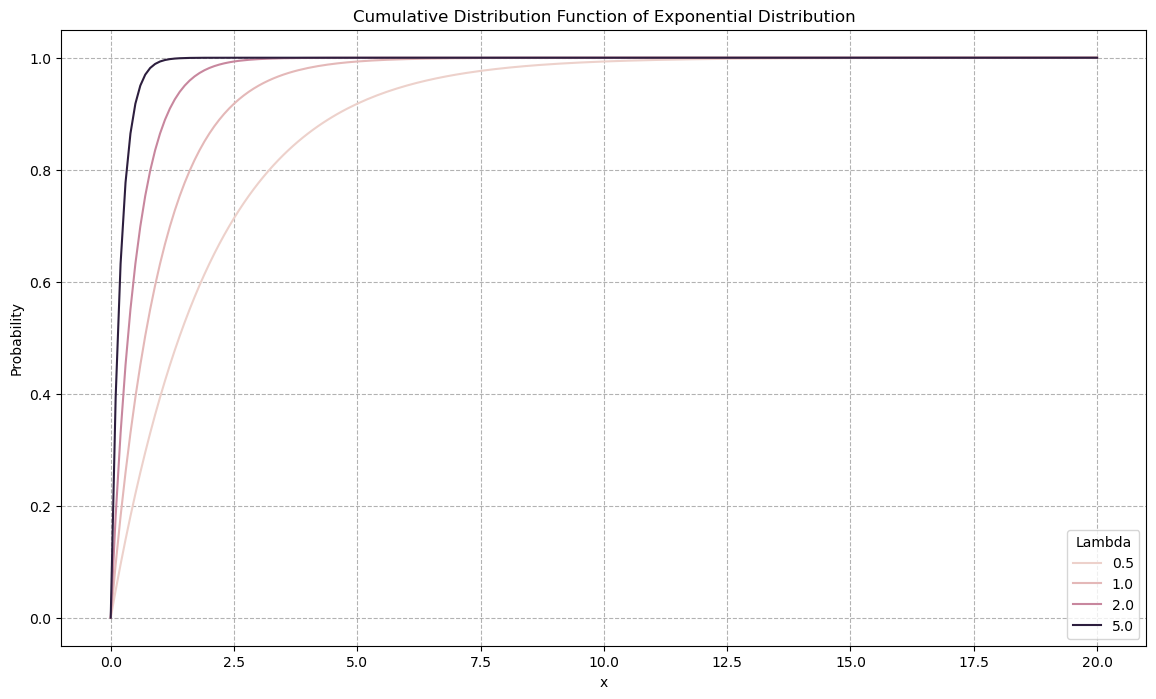

In [8]:
e_fx = lambda lam, x: stats.expon.pdf(x, scale=1/lam)
e_Fx = lambda lam, x: stats.expon.cdf(x, scale=1/lam)
plot_distributions(e_fx, e_Fx, 'Exponential', 'Lambda', xmin=0)

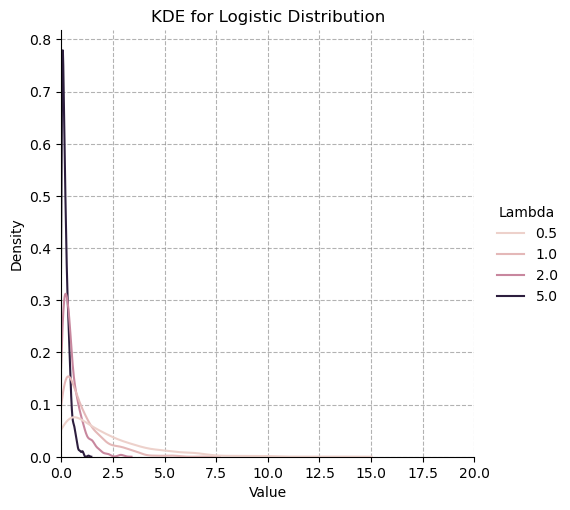

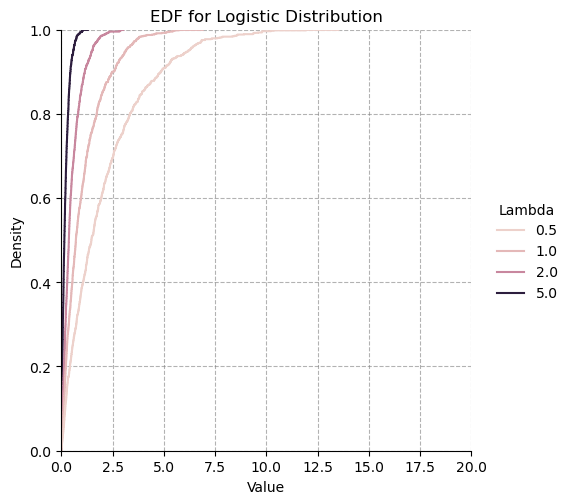

In [9]:
plot_samples(lambda rng, scale, n: rng.exponential(scale=1/scale, size=n), 'Logistic', 'Lambda', xmin=0)

In [ ]:
# The only data in metabric that seems to follow an exponential distribution 
# is the "Lymph nodes examined positive" feature, which starts at zero and quickly drops off.
# However, it is a discrete variable, so it cannot truly follow an exponential distribution.
# See the chart for "Lymph nodes examined positive" under Negative Binomial Distribution below.

#### Negative Binomial distribution

The probability mass function for positive integers is:
$$
f(k;r,p) = \dfrac{(k+r-1)!}{k!(r-1)!}(1-p)^k p^r, \quad \text{ for $k=0,...n$}
$$

You can interpret this as follows: Flip a coin that comes up heads with probability $p$ until you get $r$ heads, and then stop. What is the probability of stopping at each $k=0,1,2,...$?

The support for this distribution is $k \in \{r, r+1, r+2, r+3, ...\}$, with the given interpretation since one can't stop until at least r trials in order to get r successes (with no failures). However, some definitions use "number of failures occurring before r successes", in which case $k \in \{0, 1, 2, ...\}$. 

<!--
References

https://en.wikipedia.org/wiki/Negative_binomial_distribution
https://www.acsu.buffalo.edu/~adamcunn/probability/negativebinomial.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon
-->

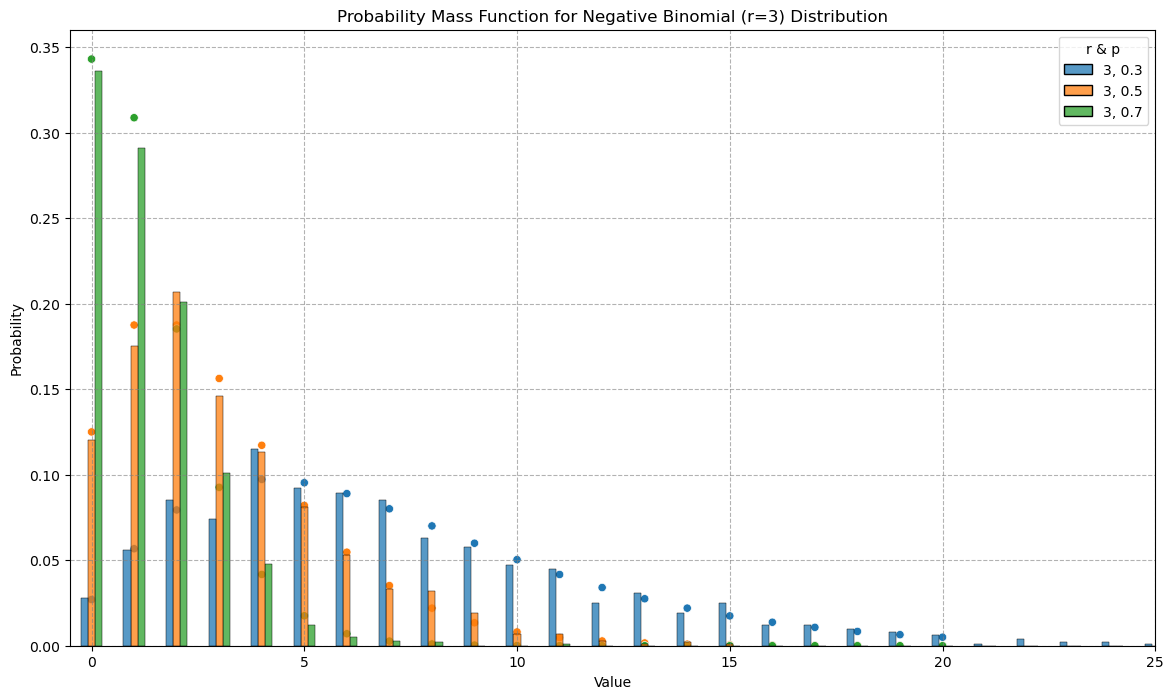

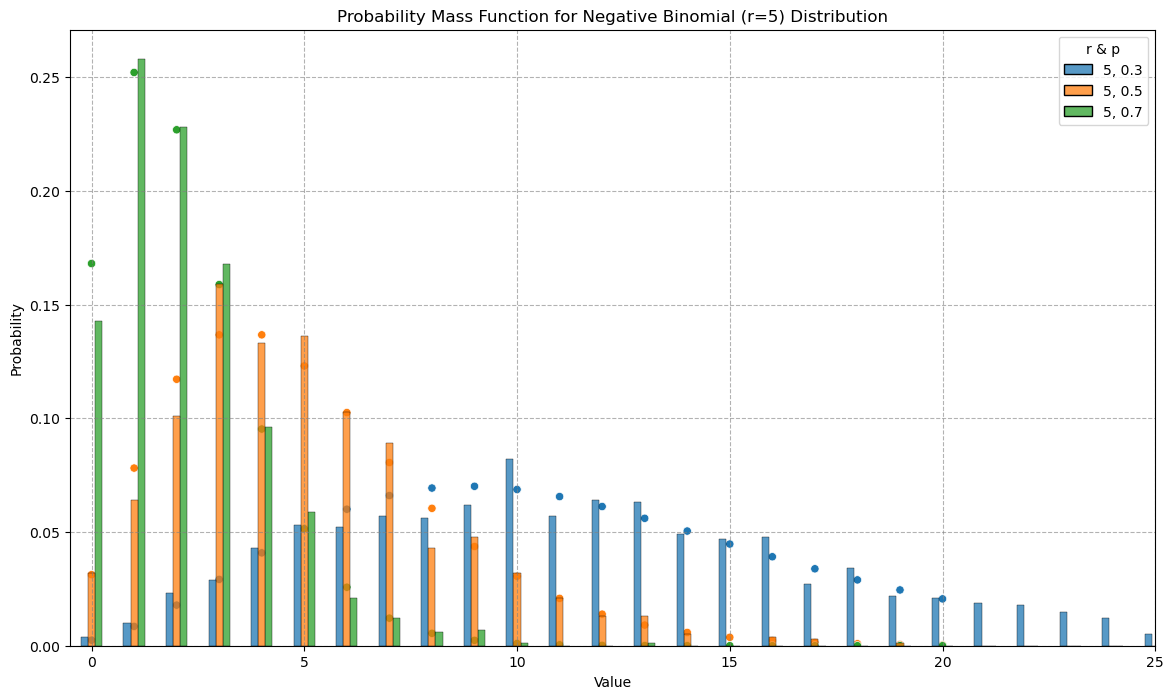

In [ ]:
def plot_nb_samples(samplefx, distribution_name, samplecount=1000, rs=[3], ps=[0.3, 0.5, 0.7]):
#
# samplefx is a function that takes a numpy random number generator, scale and number of samples as arguments
# and returns a numpy array of samples
#

    rng = np.random.default_rng(random_seed)

    pdf = pd.DataFrame(columns=['value', 'k', 'r', 'p', 'r & p'], dtype=np.float64)
    samples = pd.DataFrame(columns=['value', 'r', 'p', 'r & p'], dtype=np.float64)
    
    for r in rs:
        for p in ps:
            # PMF values
            for k in range(0, 21):
                pdf.loc[len(pdf)] = [stats.nbinom.pmf(k, n=r, p=p), k, r, p, f'{r}, {p}']
            # Sample values
            for x in samplefx(rng, r, p, samplecount):
                #print(f'adding sample {x} for scale {scale}')
                samples.loc[len(samples)] = [x, r, p, f'{r}, {p}']
    
    fig, ax = plt.subplots()
    sns.scatterplot(pdf, x='k', y='value', hue='r & p', markers="_", ax=ax)
    sns.histplot(samples, x='value', hue='r & p', 
                binwidth=.1, shrink=0.5,
                stat='probability', common_norm=False, discrete=True, multiple='dodge',
                ax=ax
                )
    plt.title(f'Probability Mass Function for {distribution_name} Distribution')
    plt.xlim(-.5, 25)
    plt.xlabel('Value')
    plt.ylabel('Probability')
    plt.grid(True, linestyle='--', color='gray', alpha=0.6)
    plt.show()

    return samples

for r in [3,5]:
    plot_nb_samples(lambda rng, r, p, n: rng.negative_binomial(n=r, p=p, size=n), 
                    f'Negative Binomial (r={r})', rs=[r])

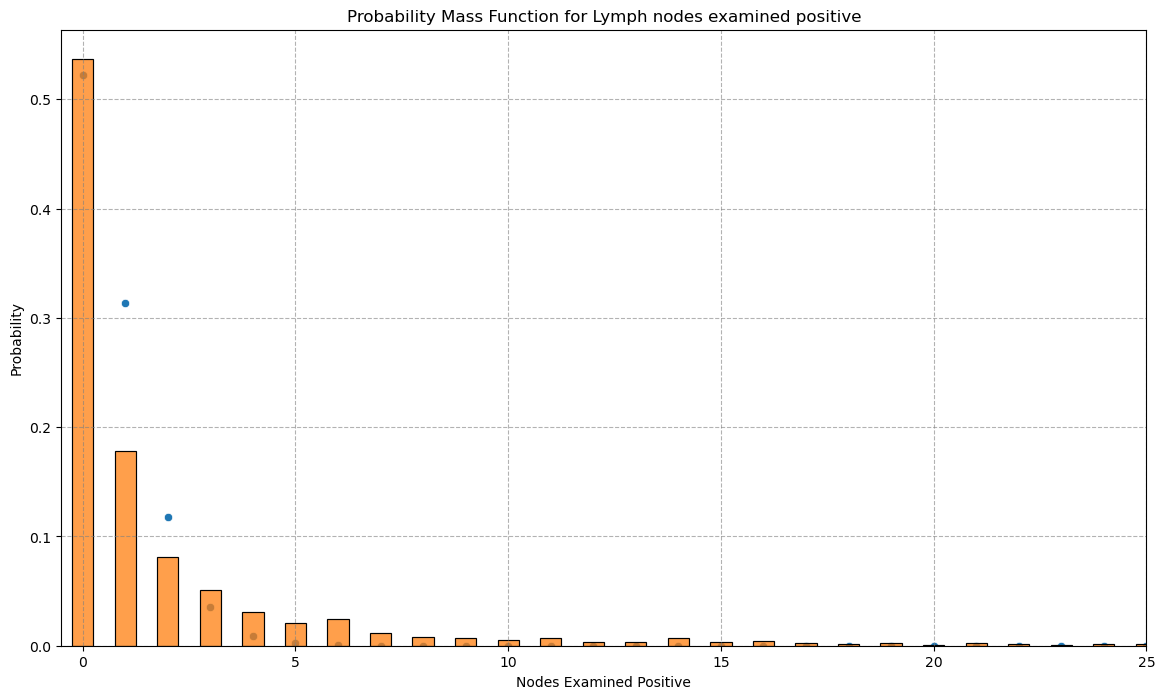

In [ ]:
# Negative Binomial Distribution in metabric dataset
# Lymph nodes examined positive behaves similarly to a negative binomial distribution
# with r=4 and p=0.85 providing a similar exponential decay shape over discrete
# values

pdf = pd.DataFrame(columns=['value', 'nodes'], dtype=np.float64)

r = 4
p = 0.85
for k in range(0, int(max(metabric['Lymph nodes examined positive']))+1):
    pdf.loc[len(pdf)] = [stats.nbinom.pmf(k, n=r, p=p), k]

fig, ax = plt.subplots()
sns.scatterplot(pdf, x='nodes', y='value', markers="_", ax=ax)
sns.histplot(metabric, x='Lymph nodes examined positive',
            binwidth=.1, shrink=0.5,
            stat='probability', common_norm=False, discrete=True, multiple='dodge',
            ax=ax
            )
plt.title(f'Probability Mass Function for Lymph nodes examined positive')
plt.xlim(-.5, 25)
plt.xlabel('Nodes Examined Positive')
plt.ylabel('Probability')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)
plt.show()

#### Categorical

The probability mass function over $k = 1, 2, ..., K$ categories is
$$
f(k;p_1,...,p_K) = p_1^{k=1}p_2^{k=2}...p_K^{k=K}
$$
where $0 \le p_i \le 1$ and $ \sum_{k=1}^K p_k = 1$.

The support is $k \in \{1, ..., k\}$


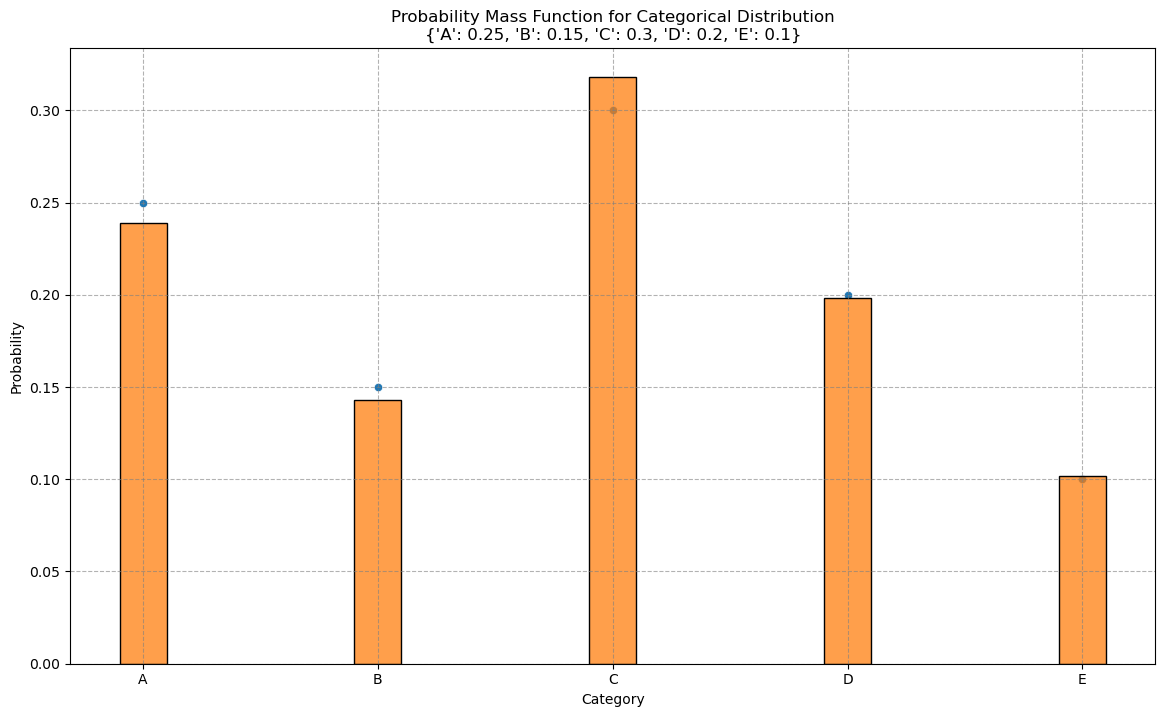

In [26]:
probabilities = {'A':0.25, 'B': 0.15, 'C': 0.3, 'D': 0.2, 'E': 0.1}
pdf = pd.DataFrame(columns=['Category', 'Probability'])
for k, p in probabilities.items():
    pdf.loc[len(pdf)]= [k, p]

cumulative = np.cumsum(pdf['Probability'].values)
samples = pd.DataFrame(columns=['value'], dtype=np.float64)
for _ in range(1000):
    u = np.random.uniform(0,1)
    for i, cum_p in enumerate(cumulative):
        if u < cum_p:
            samples.loc[len(samples)] = [pdf['Category'].values[i]]
            break


fig, ax = plt.subplots()

sns.scatterplot(pdf, x='Category', y='Probability', markers="_", ax=ax)
sns.histplot(samples, x='value',
            binwidth=.1, shrink=0.2,
            stat='probability', common_norm=False, discrete=True, multiple='dodge',
            ax=ax
            )
plt.title(f'Probability Mass Function for Categorical Distribution\n{probabilities}')
plt.xlabel('Category')
plt.ylabel('Probability')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)
plt.show()

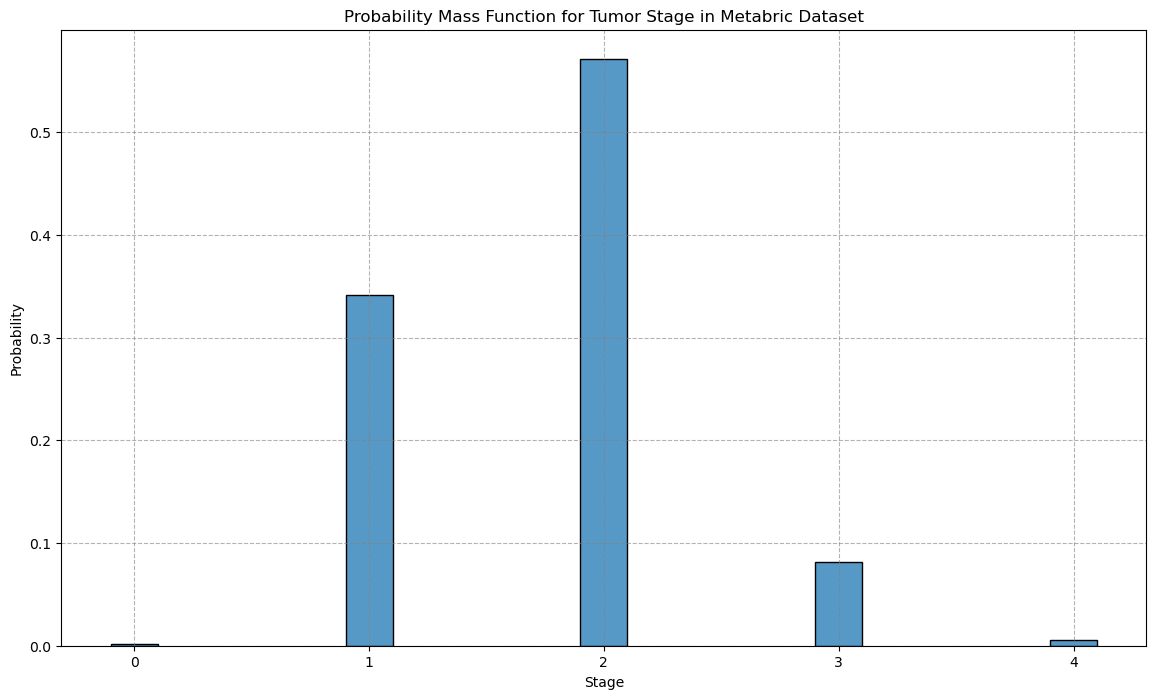

In [32]:
# Categorical distribution in metabric dataset
# The variable 'tumor_stage' is categorical with 4 distinct values

sns.histplot(metabric, x='Tumor Stage',
            binwidth=.1, shrink=0.2,
            stat='probability', common_norm=False, discrete=True, multiple='dodge'
            )
plt.title(f'Probability Mass Function for Tumor Stage in Metabric Dataset')
plt.xlabel('Stage')
plt.ylabel('Probability')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)
plt.show()